In [1]:
# Code for implementing absorption length in GalSim
# Craig Lage - 17Feb17 - UC Davis
from pylab import *
import sys
import astropy.table
from IPython.display import Image
from IPython.core.display import HTML 
topdir='/Users/cslage/Research/LSST/code/'
thedir=topdir+'galsim-git/GalSim/devel/poisson/'

In [2]:
# Read in the astropy absorption table
abs_table = astropy.table.Table.read('absorption.csv', format='ascii.csv', names = 'wlen')   
print abs_table.keys

<bound method Table.keys of <Table masked=True length=240>
  w      l         e       n  
int64 float64   float64  int64
----- -------- --------- -----
  255  3.77192 1860000.0    --
  260   3.9932 1930000.0    --
  265   4.2659 2020000.0    --
  270  4.59584 2140000.0    --
  275  4.92976 2250000.0    --
  280  5.19654 2330000.0    --
  285  5.35624 2360000.0    --
  290  5.31243 2300000.0    --
  295  4.84625 2060000.0    --
  300  4.29002 1800000.0    --
  ...      ...       ...   ...
 1405 8.72e-13   7.8e-08    --
 1410 6.04e-13  5.39e-08    --
 1415 6.16e-13  5.47e-08    --
 1420 4.29e-13   3.8e-08    --
 1425 2.85e-13  2.51e-08    --
 1430 2.04e-13  1.79e-08    --
 1435 2.44e-13  2.13e-08    --
 1440 1.38e-13   1.2e-08    --
 1445 1.25e-13  1.09e-08    --
 1450 1.09e-13  9.45e-09    -->


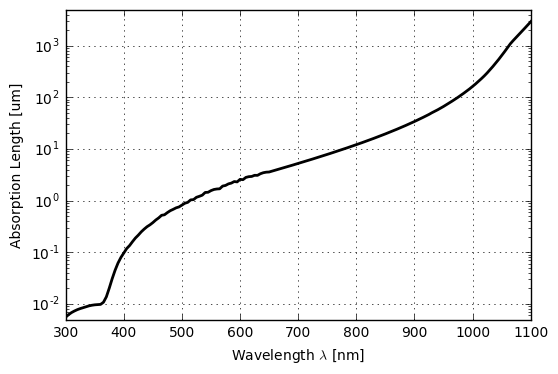

In [3]:
# Plot out the absorption length vs wavelength
abs_table = astropy.table.Table.read('absorption.csv', format='ascii.csv', names=('wlen'))   
figure()    
wlen = abs_table['w'].quantity
abs_len = 1.0E4 / abs_table['e'].quantity

plot(wlen, abs_len, 'k-', lw=2, label='$\alpha(\lambda)$')
yscale('log')
xlabel('Wavelength $\lambda$ [nm]')
ylabel('Absorption Length [um]')
xlim(300., 1100.)
ylim(0.005, 5e3)
grid()
    
show()

In [4]:
# Double check with data from PV site - looks like the same data
Image(url="http://www.pveducation.org/sites/default/files/PVCDROM/Appendices/Images/Si%20Absorption%20Depth.png")

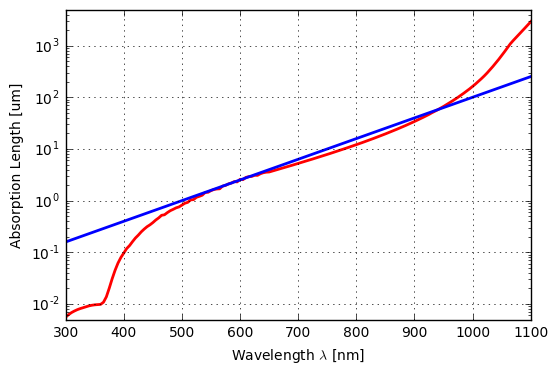

In [6]:
# Plot the astropy data against the approximate formula I've been using, and build the text file
# which will be read into GalSim
abs_table = astropy.table.Table.read('absorption.csv', format='ascii.csv', names=('wlen'))   
# Calculate the absorption length in microns.
wlen_ap = abs_table['w'].quantity
abs_len_ap = 1.0E4 / abs_table['e'].quantity

file = open(thedir+"absorption/abs_length.dat","w")
file.write("Lambda(nm) \t Abs length (um)\n")
for i, lam in enumerate(wlen_ap):
    file.write("%.2f \t %.6f\n"%(lam,abs_len_ap[i]))
file.close()
figure()    

plot(wlen_ap, abs_len_ap, 'k-', lw=2, color = 'red', label='$\alpha(\lambda)$')

wlen = linspace(200.0, 1200.0, 20) # Wavelength in nm
alpha = 10**(4.0 - (wlen - 500.0) / 250.0) * 1.0E-4 # Approximate formula in micron^-1
abs_len = 1.0 / alpha # in microns

plot(wlen, abs_len, 'k-', lw=2, color = 'blue', label='$\alpha(\lambda)$')
yscale('log')
xlabel('Wavelength $\lambda$ [nm]')
ylabel('Absorption Length [um]')
xlim(300., 1100.)
ylim(0.005, 5e3)
grid()
    
show()

Abs_length = 100.000000 microns
265.874439408


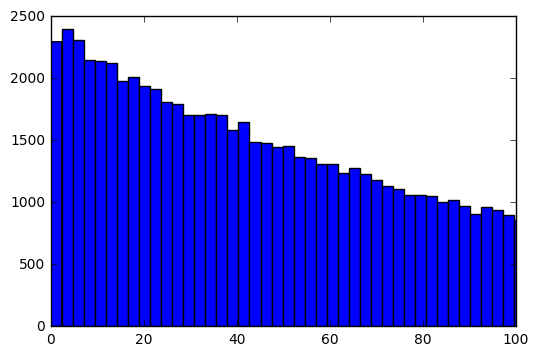

In [13]:
# This cell allows you to look at the distribution for a given wavelength
lam = 1000.0
abs_length = 10**(-4.0 + (lam - 500.0) / 250.0) * 1.0E4 # Approximate formula in micron^-1
abs_length = 
print "Abs_length = %f microns"%abs_length
trials = []
for i in range(100000):
    L = -abs_length * log(1.0 - rand())
    if i%100000 == 0:
        print L
    trials.append(L)

hist(trials,bins=500)
xlim(0,100.0)
show()

In [12]:
abs_test = loadtxt(thedir+"absorption/abs_length.dat", skiprows = 1)
print abs_test.size
print abs_test[0:4]
print abs_test[-2:-1]

480
[[  2.55000000e+02   5.37600000e-03]
 [  2.60000000e+02   5.18100000e-03]
 [  2.65000000e+02   4.95000000e-03]
 [  2.70000000e+02   4.67300000e-03]]
[[  1.44500000e+03   9.17431193e+11]]
